In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## Create Train and Test datasets

In [ ]:
# load the dataset
df = pd.read_csv('diabetes_prediction_dataset.csv')
df.head()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [14]:
# check for missing values
df.isnull().sum()


gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [15]:
# check for duplicate rows
df.duplicated().sum()

3854

In [16]:
# check for unique values in each column
for col in df.columns:
    if df[col].dtype == 'object':
        print(f'{col} : {df[col].unique()}')
    else:
        print(f'{col} : [{df[col].min()}, {df[col].max()}]')


gender : ['Female' 'Male' 'Other']
age : [0.08, 80.0]
hypertension : [0, 1]
heart_disease : [0, 1]
smoking_history : ['never' 'No Info' 'current' 'former' 'ever' 'not current']
bmi : [10.01, 95.69]
HbA1c_level : [3.5, 9.0]
blood_glucose_level : [80, 300]
diabetes : [0, 1]


Train set:
diabetes
0    0.915
1    0.085
Name: proportion, dtype: float64
Test set:
diabetes
0    0.915
1    0.085
Name: proportion, dtype: float64


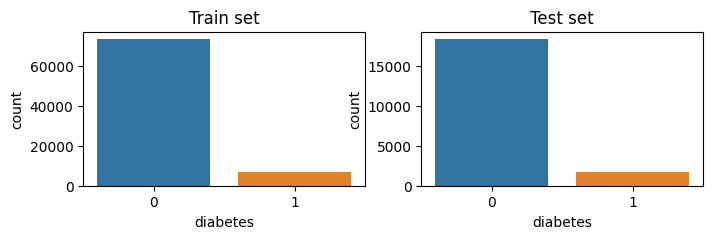

In [17]:
# split the dataset into train and test sets
target = 'diabetes'

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42, shuffle=True, stratify=df[target])

# show the target distribution in train and test sets
print('Train set:')
print(df_train[target].value_counts(normalize=True))
print('Test set:')
print(df_test[target].value_counts(normalize=True))

# visualize the target distribution in train and test sets
fig, ax = plt.subplots(1, 2, figsize=(8, 2))
sns.countplot(x=df_train[target], ax=ax[0])
ax[0].set_title('Train set')
sns.countplot(x=df_test[target], ax=ax[1])
ax[1].set_title('Test set')
plt.show()


## Create Model

In [ ]:
# create model as pipeline 

# 1. create a pipeline for numeric features
numeric_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# 2. create a pipeline for categorical features
categoricalFeatures = ['gender', 'smoking_history']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# 3. define boolean features, which will be passed through the pipeline
booleanFeatures = ['hypertension', 'heart_disease']

# 4. create a column transformer to combine both pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categoricalFeatures),
        ('bool', 'passthrough', booleanFeatures),
    ],
    remainder='drop'
)

# 5. create a pipeline for the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# # configure model
# model.set_params(
#     classifier__C=10, 
#     classifier__solver='liblinear', 
#     classifier__max_iter=1000, 
#     classifier__class_weight='balanced',
#     preprocessor__num__scaler__with_mean=True)

# print
model

In [ ]:
# configure model
model.set_params(
    classifier__C=0.1,
    classifier__solver='liblinear',
    classifier__max_iter=1000,
    classifier__class_weight='balanced',
    preprocessor__num__scaler__with_mean=False)


## Train

In [ ]:
# fit the model
X_train = df_train.drop(target, axis=1)
y_train = df_train[target]
model.fit(X_train, y_train)

# make predictions on the test set
X_test = df_test.drop(target, axis=1)
y_test = df_test[target]
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# evaluate the model

# 1. accuracy score
print(f'Accuracy score: {accuracy_score(y_test, y_pred):.4f}')

# 2. confusion matrix
print(f'Confusion matrix: \n{confusion_matrix(y_test, y_pred)}')

# 3. ROC AUC score
print(f'ROC AUC score: {roc_auc_score(y_test, y_pred_proba):.4f}')

# 4. classification report
print(f'Classification report: \n{classification_report(y_test, y_pred)}')
